In [1]:
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import seaborn as sns
import numpy as np
import re
import os
import tweepy
#import twitter
import csv
import pandas as pd
import operator
%matplotlib inline

In [34]:
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [2]:
df = pd.read_csv("sports_tweet_final.csv",encoding='utf-8')

In [3]:
df['team']=""

In [4]:
df['player']=""

In [5]:
df.head()

,timestamp,tweet,source,team,player
0,11/8/2018 23:48,b'RT @PatelTejesh: Desperately waiting for sem...,Twitter Web Client,,
1,11/8/2018 22:47,b'India-West Indies ODI Series \xe2\x80\x93 3r...,Tweet Old Post,,
2,11/8/2018 22:08,b'@imVkohli \nI think ur immature and Impulsiv...,Twitter for Android,,
3,11/8/2018 21:43,b'STOP SUPPORTING @BCCI TEAM!!! MAKE THEM TO L...,Twitter for Android,,
4,11/8/2018 21:10,b'RT @umeshkshakya: Watching #INDVsWI 2nd T20 ...,Twitter for Android,,


In [6]:
df.describe()

,timestamp,tweet,source,team,player
count,27750,27750,27750,27750,27750
unique,4173,10528,65,1,1
top,11/4/2018 16:49,b'RT @ashwinravi99: Said this in 2011 when I g...,Twitter for Android,,
freq,129,692,17830,27750,27750


In [7]:
 players = {'Rohit': 'Rohit,imRo45,Rohit Sharma' , 'Shikhar':'SDhawan25,dhawan,Shikhar','Rahul':'KL Rahul,Rahul,klrahul11'
 ,'Dinesh':'DK,Dinesh,Karthik,DineshKarthik', 'Manish':'Manish,Pandey,im_manishpandey','Shreyas':'Shreyas,Iyer', 'Rishabh':'Rishabh,Pant,Rishabhpanth'
 ,'Krunal':'krunal,krunalpandya24' ,'washington':'washington,sundar','bhuveneshwar':'bhuvi,bhuveneshwar','Chahal':'chahal,yuzi,Yuzevendra,yuzi_chahal'
 ,'Kuldeep':'kuldeep,mkuldeep18' , 'Bumrah':'Bumrah,Jaspritbumrah93' , 'Khaleel':'Khaleel,Ahmed','Umesh':'Umesh,y_umesh','Ajinkya':'Rahane,Ajinkya,ajinkyarahane88'
 ,'Dhoni':'msdhoni,dhoni','Virat': 'imVkohli,kohli,virat', 'Hardik':'hardik,hardikpandya7'
 ,'Carlos':'brathwaite88,Carlos','Fabian':'Fabian','Darren':'DMBravo46,Darren','Shimron':'Shetmyer,Shimron'
 ,'Evin':'Evin17Lewis,Evin','Obed':'Obed','Ashley':'AshleyNurse,Ashley','Keemo':'Keemo'
 ,'Khary':'Khary','Kieron':'KieronPollard55,Kieron','Rovman':'Rovman','Denesh':'Denesh','Andre':'Russell12A,Andre','Sherfane':'Sherfane'
 ,'Oshane':'Oshane'}
    
def clean_tweets(tweet):
    url_pattern = re.compile('https\S+')
    url = url_pattern.sub('',tweet)
    mentions = re.compile('#\w+')
    clean_tweet = (mentions.sub('',url))
    clean_tweet = clean_tweet.lower()
    return clean_tweet

def get_team_label(tweet):
        if tweet.find('india') != -1 and tweet.find('West Indies') !=1:
                return 2
        elif tweet.find('West Indies') != -1:
                return 0
        elif tweet.find('India') != -1:
                return 1
        else:
                return 3 

def get_player_label(tweet):
    for k, v in players.items():    
        names = v.split(',')
        for name in names:
            if tweet.find(name.lower()) != -1:
                return k
            
#get player name based on player name count
def get_player_label_weight(tweet):
    nameCountDict = {}
    for k, v in players.items():    
        names = v.split(',')
        nameCount = 0
        for name in names:
            nameCount = nameCount + tweet.count(name.lower())
        nameCountDict[k] = nameCount
    #print(nameCountDict)
    #print(max(nameCountDict.values()))
    if max(nameCountDict.values()) != 0:
        return max(nameCountDict.items(), key=operator.itemgetter(1))[0]
    else:
        return -1
                
def get_team_label_weight(tweet):
        indCount = tweet.count("india")
        westIndCount = tweet.count("west indies")
        #print("india,westind", indCount, westIndCount)
        if indCount > westIndCount:
            return 1
        elif westIndCount > indCount:
            return 0
        else:
            return 2
        

In [8]:
for i,row in df.iterrows():
    clean_tweet = clean_tweets(row['tweet'])
    df.at[i,'tweet'] = clean_tweet
    team_label = get_team_label_weight(clean_tweet)
    df.at[i,'team'] = team_label
    player_label = get_player_label_weight(clean_tweet)
    df.at[i,'player'] = player_label

In [9]:
df['team'].value_counts()

2    20869
1     6319
0      562
Name: team, dtype: int64

In [10]:
df['player'].value_counts()

-1              13402
Rohit            3301
Krunal           1721
Dinesh           1649
Dhoni            1397
Virat            1237
Kuldeep           814
Shikhar           606
Khaleel           563
Rahul             554
Rishabh           452
Oshane            299
Manish            284
Bumrah            237
Umesh             205
Andre             174
Kieron            148
Carlos            134
Chahal            108
Hardik             82
Darren             73
bhuveneshwar       56
Fabian             51
Shreyas            43
washington         42
Denesh             33
Shimron            25
Keemo              19
Rovman             10
Khary               9
Evin                9
Ajinkya             7
Ashley              5
Sherfane            1
Name: player, dtype: int64

In [11]:
df.head()

,timestamp,tweet,source,team,player
0,11/8/2018 23:48,b'rt @pateltejesh: desperately waiting for sem...,Twitter Web Client,2,-1
1,11/8/2018 22:47,b'india-west indies odi series \xe2\x80\x93 3r...,Tweet Old Post,1,-1
2,11/8/2018 22:08,b'@imvkohli \ni think ur immature and impulsiv...,Twitter for Android,2,Virat
3,11/8/2018 21:43,b'stop supporting @bcci team!!! make them to l...,Twitter for Android,2,Virat
4,11/8/2018 21:10,b'rt @umeshkshakya: watching 2nd t20 cricket ...,Twitter for Android,2,Umesh


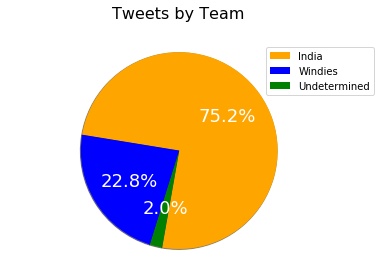

In [12]:
# ratio of Tweets by Team
labels = 'India', 'Windies', 'Undetermined'
colors = ['orange', 'blue', 'green']

# Plot
_, _, autotexts = plt.pie(df['team'].value_counts(), colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=260, radius=4.0, textprops={'fontsize': 18})
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title("Tweets by Team\n", fontsize = 16)
plt.legend(labels, loc='upper right', fontsize =10, bbox_to_anchor=(1.1,1))
plt.axis('equal')
plt.show()


[]

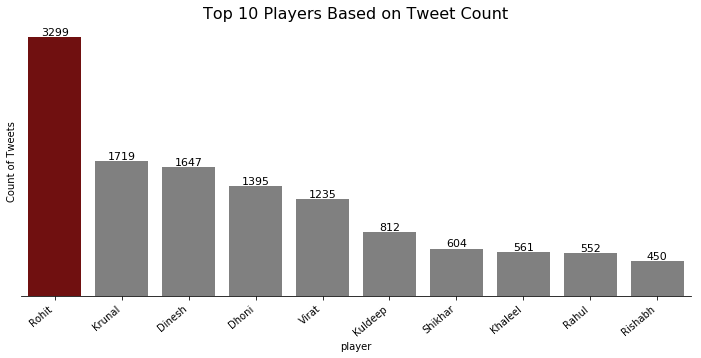

In [13]:
# Top Ten players based on the Tweet Count
fig=plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['player'], data=df, order=pd.value_counts(df['player']).iloc[1:11].index, 
              palette=['maroon', 'gray', 'gray','gray','gray','gray','gray','gray','gray','gray'] )
plt.ylabel('Count of Tweets')
plt.title("Top 10 Players Based on Tweet Count", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True)
ax.set_yticks([])

[]

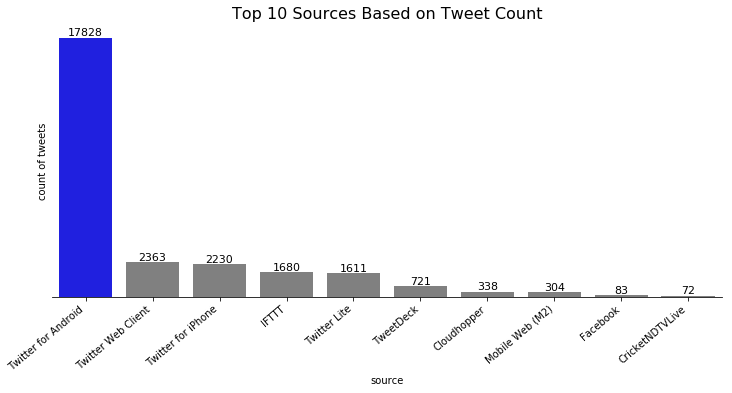

In [14]:
# Top Ten sources based on the Tweet Count
fig=plt.figure(figsize=(12,5))
ax=sns.countplot(x=df['source'], data=df, order=pd.value_counts(df['source']).iloc[:10].index, 
              palette=['blue', 'gray', 'gray','gray','gray','gray','gray','gray','gray','gray'] )
plt.ylabel('count of tweets')
plt.title("Top 10 Sources Based on Tweet Count", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
sns.despine(left=True)
ax.set_yticks([])

In [15]:
df['Dates'] = pd.to_datetime(df['timestamp']).dt.date
df['Time'] = pd.to_datetime(df['timestamp']).dt.time

In [16]:
df['Hour'] = pd.to_datetime(df['timestamp']).dt.hour

In [17]:
df['Hour'].value_counts()

16    4520
17    3728
13    2911
15    2861
14    2838
18    1427
12     902
11     871
8      787
3      758
6      699
5      689
4      667
19     653
9      650
10     616
7      559
2      463
1      367
20     251
21     163
0      135
22     127
23     108
Name: Hour, dtype: int64

In [18]:
df.head()

,timestamp,tweet,source,team,player,Dates,Time,Hour
0,11/8/2018 23:48,b'rt @pateltejesh: desperately waiting for sem...,Twitter Web Client,2,-1,2018-11-08,23:48:00,23
1,11/8/2018 22:47,b'india-west indies odi series \xe2\x80\x93 3r...,Tweet Old Post,1,-1,2018-11-08,22:47:00,22
2,11/8/2018 22:08,b'@imvkohli \ni think ur immature and impulsiv...,Twitter for Android,2,Virat,2018-11-08,22:08:00,22
3,11/8/2018 21:43,b'stop supporting @bcci team!!! make them to l...,Twitter for Android,2,Virat,2018-11-08,21:43:00,21
4,11/8/2018 21:10,b'rt @umeshkshakya: watching 2nd t20 cricket ...,Twitter for Android,2,Umesh,2018-11-08,21:10:00,21


In [19]:
#group data by hour and team
tweets_by_hr_team= df['Dates'].groupby([df['Hour'], df['team']]).count().unstack()

Text(0.5,0,'tweet hour')

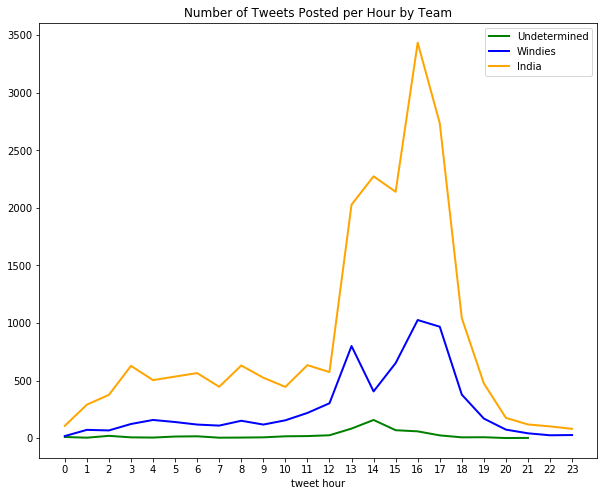

In [20]:
# plot number of Tweets occurred per hour by team
labels = 'Undetermined', 'Windies', 'India'
mycolors =['green','blue', 'orange']
tweets_by_hr_team.plot(figsize=(10,8), title='Number of Tweets Posted per Hour by Team', linewidth=2.0, color=mycolors)
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

plt.xticks(range(len(hours)), hours)
plt.legend(labels, loc='upper right', fontsize =10)
plt.xlabel('tweet hour', fontsize=10)

In [21]:
df['Day'] = pd.to_datetime(df['timestamp']).dt.day

In [22]:
# group date data by Tweet day and team
tweets_by_day_team= df['Dates'].groupby([df['Day'], df['team']]).count().unstack()

([<matplotlib.axis.XTick at 0x147aa791a20>,
 <a list of 9 Text xticklabel objects>)

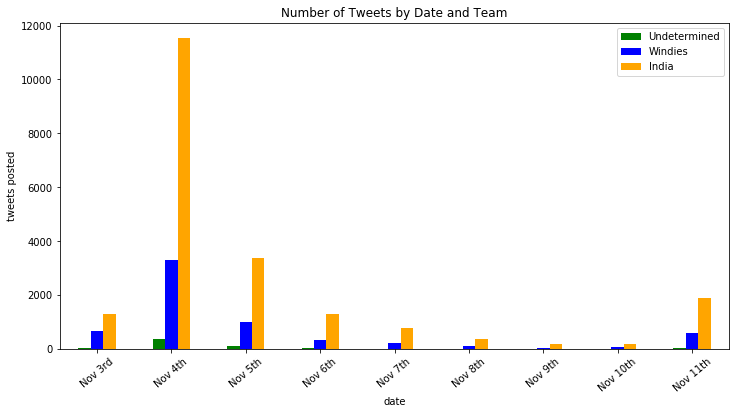

In [23]:
labels = 'Undetermined', 'Windies', 'India'
mycolors1 =['green','blue', 'orange']
tweets_by_day_team.plot(figsize=(12,6),kind='bar', title='Number of Tweets by Date and Team', color=mycolors1)

plt.legend(labels, loc='upper right', fontsize =10)
plt.ylabel('tweets posted', fontsize=10)
plt.xlabel('date', fontsize=10)
plt.xticks(np.arange(9), ('Nov 3rd', 'Nov 4th', 'Nov 5th', 'Nov 6th', 'Nov 7th', 'Nov 8th','Nov 9th', 'Nov 10th', 'Nov 11th'), fontsize=10, rotation=40)

In [24]:
# create new dataframe for Rohit
rohit_tweets = df[df['player']=='Rohit']

In [25]:
rohit_tweets.head()

,timestamp,tweet,source,team,player,Dates,Time,Hour,Day
8,11/8/2018 18:09,b'rt @sportzwiki: rohit sharma to drop this st...,Twitter for Android,1,Rohit,2018-11-08,18:09:00,18,8
14,11/8/2018 16:04,b'rt @saurabhten: rohit sharma 111*(61) become...,Twitter for Android,2,Rohit,2018-11-08,16:04:00,16,8
17,11/8/2018 15:32,b'rt @harbhajan_singh: top knock @imro45 keep ...,Twitter for iPhone,2,Rohit,2018-11-08,15:32:00,15,8
18,11/8/2018 15:31,"b""rt @imraina: ek se badhkey do! congratulatio...",Twitter for iPhone,2,Rohit,2018-11-08,15:31:00,15,8
26,11/8/2018 13:43,b'rohit sharma to drop this star cricketer for...,Twitter Web Client,1,Rohit,2018-11-08,13:43:00,13,8


In [26]:
rohit_tweets['player'].value_counts()

Rohit    3301
Name: player, dtype: int64

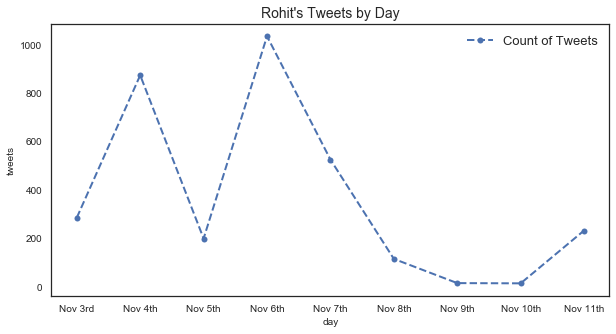

In [27]:
# group day data and plot number of tweets by day for Rohit
sns.set(style="white", context="talk")
day = ['Nov 3rd', 'Nov 4th', 'Nov 5th', 'Nov 6th', 'Nov 7th', 'Nov 8th','Nov 9th', 'Nov 10th', 'Nov 11th']
by_day= rohit_tweets.groupby('Dates').size().reset_index(name='Count of Tweets').set_index([[1,2,3,4,5,6,7,8,9],'Dates'])

ax= by_day.plot(kind="line",figsize=(10,5), linestyle='--', marker='o', linewidth=2.0, markersize=6.0)
plt.title("Rohit's Tweets by Day", fontsize = 14)

plt.xticks(range(len(day)), day)
plt.ylabel("tweets", fontsize=10)
plt.xlabel("day", fontsize=10)
ax.tick_params(labelsize=10)

In [28]:
#group data by hour and team
rohit_tweet_by_hr= rohit_tweets['Dates'].groupby([rohit_tweets['Hour'], rohit_tweets['Day']]).count().unstack()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

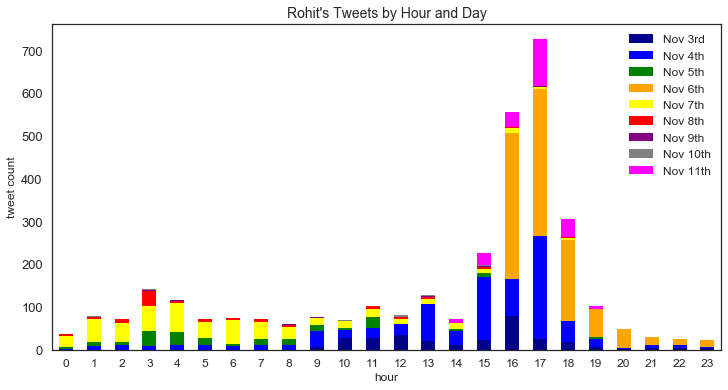

In [29]:
# plot Rohit's Tweets by Hour and Day
day_labels = 'Nov 3rd', 'Nov 4th', 'Nov 5th', 'Nov 6th', 'Nov 7th', 'Nov 8th','Nov 9th', 'Nov 10th', 'Nov 11th'
mynewcolors = ['darkblue', 'blue', 'green', 'orange', 'yellow', 'red','purple', 'gray', 'magenta' ]
sns.set(style="white", context="talk")

rohit_tweet_by_hr.plot(kind='bar', stacked=True, figsize=(12,6), color = mynewcolors)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('tweet count', fontsize = 12)
plt.legend(day_labels, fontsize = 12)
plt.title("Rohit's Tweets by Hour and Day", fontsize = 14)
plt.xticks(rotation='horizontal', fontsize = 12)

[]

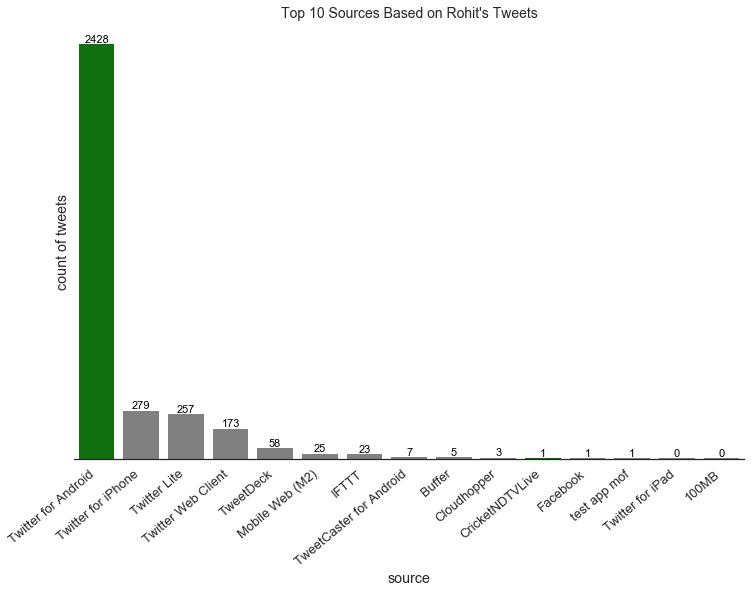

In [30]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", context="talk")

ax=sns.countplot(x=rohit_tweets['source'], data=rohit_tweets, order=pd.value_counts(rohit_tweets['source']).iloc[:15].index, 
              palette=['green', 'gray', 'gray','gray','gray','gray','gray','gray','gray','gray'] )
plt.ylabel('count of tweets')
plt.title("Top 10 Sources Based on Rohit's Tweets", fontsize=14)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.despine(left=True)
ax.set_yticks([])

In [31]:
# create new dataframe for Krunal
krunal_tweets = df[df['player']=='Krunal']

In [32]:
krunal_tweets.head()

,timestamp,tweet,source,team,player,Dates,Time,Hour,Day
36,11/8/2018 12:18,b'what was that from krunal pandya?,Twitter Lite,2,Krunal,2018-11-08,12:18:00,12,8
183,11/8/2018 12:18,b'what was that from krunal pandya?,Twitter Lite,2,Krunal,2018-11-08,12:18:00,12,8
604,11/9/2018 13:24,"b'miss being there, kill it, pandya on brother...",Twitter Web Client,2,Krunal,2018-11-09,13:24:00,13,9
797,11/8/2018 12:18,b'what was that from krunal pandya?,Twitter Lite,2,Krunal,2018-11-08,12:18:00,12,8
1141,11/11/2018 18:26,b'@bhogleharsha krunal\xe2\x80\x99s bowling lo...,Twitter for iPhone,2,Krunal,2018-11-11,18:26:00,18,11


In [33]:
krunal_tweets['Day'].value_counts()

4     1352
5      230
3      110
6       15
11       7
8        3
7        3
9        1
Name: Day, dtype: int64